In [38]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import env
import acquire
from prepare import train_validate_test_split, split_iris_data, split_titanic_data, split_telco_data

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [3]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [4]:
query = "SELECT measurements.measurement_id, measurements.sepal_length,\
                measurements.sepal_width, measurements.petal_length, \
                measurements.petal_width, species.species_name, species.species_id \
            FROM measurements JOIN species ON(species.species_id=measurements.species_id)"

In [5]:
def get_data():
    return pd.read_sql(query, get_connection('iris_db'))

In [6]:
df = get_data()

In [7]:
def prep_iris_inline(df):
    df = df.rename(columns={'species_name': 'species'})
    df = df.drop(columns=['measurement_id', 'species_id'])
    return df


In [8]:
df = prep_iris_inline(df)

In [ ]:
df.head()

In [ ]:
df.info()

In [10]:
# 80/20 train test split
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.species)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)



In [11]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

2. Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [13]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
74,6.4,2.9,4.3,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor


In [15]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.847619,3.053571,3.738095,1.208333
std,0.841324,0.417233,1.765459,0.775717
min,4.300000,2.000000,1.000000,0.100000
25%,5.075000,2.800000,1.600000,0.375000
50%,5.900000,3.000000,4.300000,1.300000
75%,6.425000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


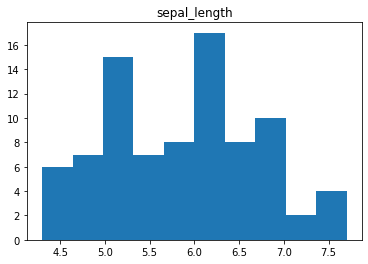

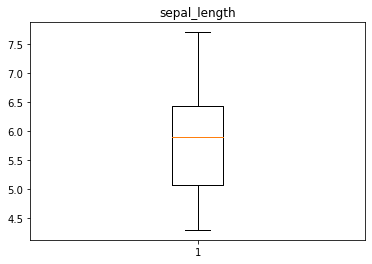

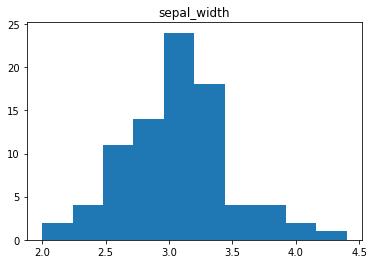

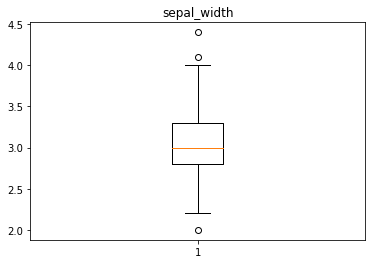

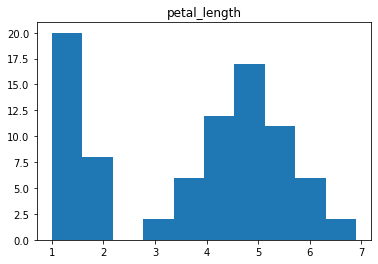

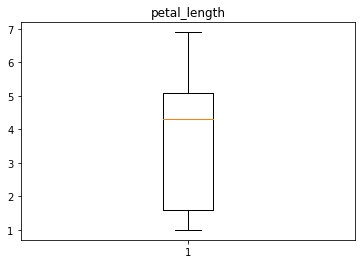

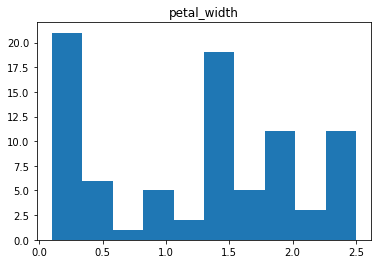

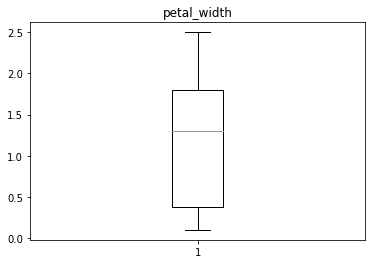

In [20]:
num_cols = train.columns[[train[col].dtype=='float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [21]:
train.species.value_counts()

virginica     28
setosa        28
versicolor    28
Name: species, dtype: int64

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

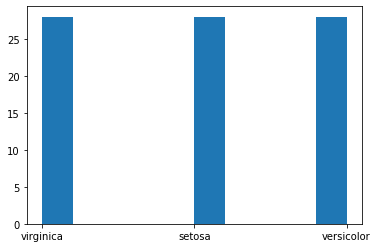

In [22]:
plt.hist(train.species)

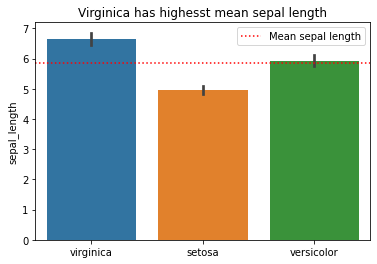

In [27]:
plt.title('Virginica has highesst mean sepal length')
sns.barplot(x='species', y = 'sepal_length', data = train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length,label = 'Mean sepal length', color = 'r', linestyle = ':')
plt.xlabel('')
plt.legend()
plt.show()


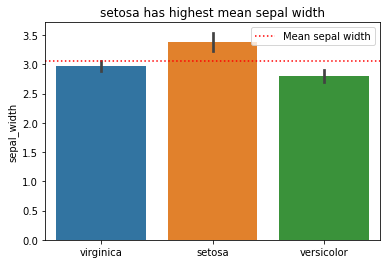

In [29]:
plt.title('setosa has highest mean sepal width')
sns.barplot(x='species', y='sepal_width', data = train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label = 'Mean sepal width', color ='r', ls = ':')
plt.xlabel('')
plt.legend()
plt.show()

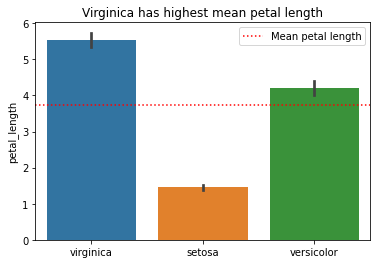

In [31]:
plt.title("Virginica has highest mean petal length")
sns.barplot(x = 'species', y= 'petal_length', data = train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label = 'Mean petal length', color = 'r', ls = ':')
plt.xlabel('')
plt.legend()
plt.show()

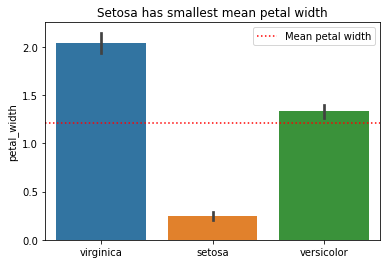

In [32]:
plt.title("Setosa has smallest mean petal width")
sns.barplot(x="species", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean petal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

In [34]:
# Virginica descriptive statistics
virginica_describe_sl = pd.DataFrame(train[train.species == 'virginica'].sepal_length.describe())
virginica_describe_sw = pd.DataFrame(train[train.species == 'virginica'].sepal_width.describe())
virginica_describe_pl = pd.DataFrame(train[train.species == 'virginica'].petal_length.describe())
virginica_describe_pw = pd.DataFrame(train[train.species == 'virginica'].petal_width.describe())

virginica_describe = pd.concat([virginica_describe_sl, virginica_describe_sw], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pl], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pw], axis=1)
virginica_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.650000,2.975000,5.539286,2.046429
std,0.532986,0.260519,0.525173,0.294998
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.600000,3.000000,5.550000,2.050000
75%,6.900000,3.200000,5.825000,2.300000
max,7.700000,3.400000,6.900000,2.500000


In [35]:
# Setosa descriptive statistics
setosa_describe_sl = pd.DataFrame(train[train.species == 'setosa'].sepal_length.describe())
setosa_describe_sw = pd.DataFrame(train[train.species == 'setosa'].sepal_width.describe())
setosa_describe_pl = pd.DataFrame(train[train.species == 'setosa'].petal_length.describe())
setosa_describe_pw = pd.DataFrame(train[train.species == 'setosa'].petal_width.describe())

setosa_describe = pd.concat([setosa_describe_sl, setosa_describe_sw], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pl], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pw], axis=1)
setosa_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,4.957143,3.385714,1.457143,0.246429
std,0.362531,0.433516,0.185450,0.129048
min,4.300000,2.300000,1.000000,0.100000
25%,4.775000,3.100000,1.400000,0.200000
50%,5.000000,3.350000,1.500000,0.200000
75%,5.100000,3.625000,1.600000,0.325000
max,5.800000,4.400000,1.900000,0.600000


In [36]:
# Versicolor descriptive statistics
versicolor_describe_sl = pd.DataFrame(train[train.species == 'versicolor'].sepal_length.describe())
versicolor_describe_sw = pd.DataFrame(train[train.species == 'versicolor'].sepal_width.describe())
versicolor_describe_pl = pd.DataFrame(train[train.species == 'versicolor'].petal_length.describe())
versicolor_describe_pw = pd.DataFrame(train[train.species == 'versicolor'].petal_width.describe())

versicolor_describe = pd.concat([versicolor_describe_sl, versicolor_describe_sw], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pl], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pw], axis=1)
versicolor_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.935714,2.800000,4.217857,1.332143
std,0.512231,0.303071,0.522142,0.205577
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.700000,3.900000,1.275000
50%,6.000000,2.900000,4.300000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,6.900000,3.400000,5.100000,1.700000


In [39]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="greater")
t, p

(768.5, 2.982389808696449e-10)

In [40]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
652.0 1.0119920315840621e-05
------------------


Comparing sepal_width between virginica and versicolor
534.0 0.009508012794926874
------------------


Comparing petal_length between virginica and versicolor
771.5 2.5253450566492905e-10
------------------


Comparing petal_width between virginica and versicolor
768.5 2.982389808696449e-10
------------------


